
步長 h = 0.1:
 t        u1(approx)    u1(exact)     error_u1     u2(approx)    u2(exact)     error_u2
0.00   1.333333   1.333333   0.00e+00   0.666667   0.666667   1.11e-16
0.10   -3.052437   1.793063   4.85e+00   8.989305   -1.032002   1.00e+01
0.20   -23.847795   1.423902   2.53e+01   51.192704   -0.874681   5.21e+01
0.30   -130.165202   1.131577   1.31e+02   269.269193   -0.724999   2.70e+02
0.40   -680.231485   0.909409   6.81e+02   1399.368584   -0.608214   1.40e+03
0.50   -3531.299585   0.738788   3.53e+03   7258.241839   -0.515658   7.26e+03
0.60   -18312.795052   0.605710   1.83e+04   37634.955483   -0.440411   3.76e+04
0.70   -94951.331907   0.499860   9.50e+04   195131.871735   -0.377404   1.95e+05
0.80   -492306.465639   0.413671   4.92e+05   1011721.872078   -0.322954   1.01e+06
0.90   -2552513.623867   0.341614   2.55e+06   5245578.826590   -0.274409   5.25e+06
1.00   -13234278.789168   0.279675   1.32e+07   27197287.206587   -0.229888   2.72e+07
1.10   -68617112.328351   0

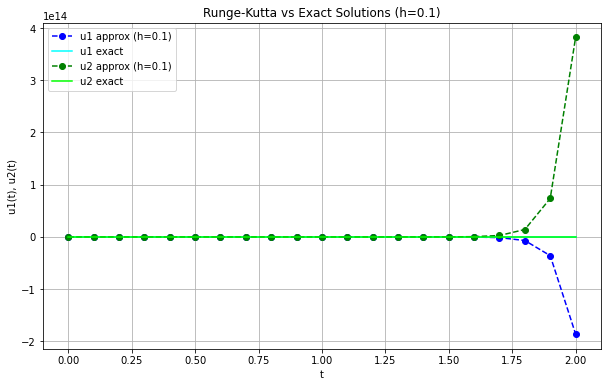


步長 h = 0.05:
 t        u1(approx)    u1(exact)     error_u1     u2(approx)    u2(exact)     error_u2
0.00   1.333333   1.333333   0.00e+00   0.666667   0.666667   1.11e-16
0.05   1.721880   1.912059   1.90e-01   -0.499599   -0.909077   4.09e-01
0.10   1.726915   1.793063   6.61e-02   -0.832598   -1.032002   1.99e-01
0.15   1.617161   1.601967   1.52e-02   -0.890373   -0.961459   7.11e-02
0.20   1.481687   1.423902   5.78e-02   -0.861042   -0.874681   1.36e-02
0.25   1.348945   1.267646   8.13e-02   -0.807505   -0.795221   1.23e-02
0.30   1.227063   1.131577   9.55e-02   -0.750341   -0.724999   2.53e-02
0.35   1.117478   1.012999   1.04e-01   -0.695886   -0.663060   3.28e-02
0.40   1.019525   0.909409   1.10e-01   -0.645732   -0.608214   3.75e-02
0.45   0.931977   0.818630   1.13e-01   -0.599934   -0.559389   4.05e-02
0.50   0.853541   0.738788   1.15e-01   -0.558092   -0.515658   4.24e-02
0.55   0.783017   0.668275   1.15e-01   -0.519706   -0.476225   4.35e-02
0.60   0.719337   0.6057

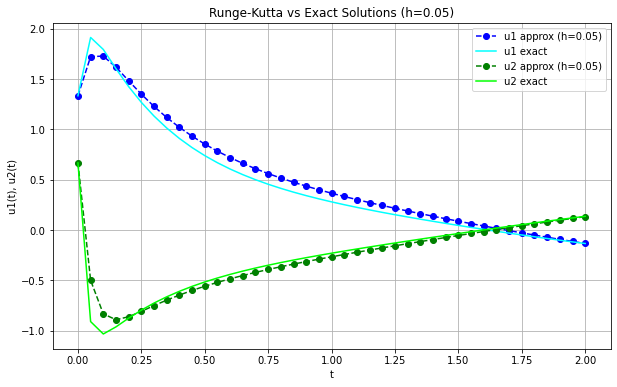

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定義微分方程
def f1(t, u1, u2):
    return 9*u1 + 24*u2 + 5*np.cos(t) - (1/3)*np.sin(t)

def f2(t, u1, u2):
    return -24*u1 - 52*u2 - 9*np.cos(t) + (1/3)*np.sin(t)

# 解析解
def exact_u1(t):
    return 2*np.exp(-3*t) - np.exp(-39*t) + (1/3)*np.cos(t)

def exact_u2(t):
    return -np.exp(-3*t) + 2*np.exp(-39*t) - (1/3)*np.cos(t)

# Runge-Kutta 四階方法
def runge_kutta(h):
    t0, u1_0, u2_0 = 0.0, 4/3, 2/3
    t_vals = [t0]
    u1_vals = [u1_0]
    u2_vals = [u2_0]

    t = t0
    u1 = u1_0
    u2 = u2_0

    while t <= 2.0:  # 計算到 t=2
        k1_1 = h * f1(t, u1, u2)
        k1_2 = h * f2(t, u1, u2)
        
        k2_1 = h * f1(t + h/2, u1 + k1_1/2, u2 + k1_2/2)
        k2_2 = h * f2(t + h/2, u1 + k1_1/2, u2 + k1_2/2)
        
        k3_1 = h * f1(t + h/2, u1 + k2_1/2, u2 + k2_2/2)
        k3_2 = h * f2(t + h/2, u1 + k2_1/2, u2 + k2_2/2)
        
        k4_1 = h * f1(t + h, u1 + k3_1, u2 + k3_2)
        k4_2 = h * f2(t + h, u1 + k3_1, u2 + k3_2)

        u1 += (k1_1 + 2*k2_1 + 2*k3_1 + k4_1) / 6
        u2 += (k1_2 + 2*k2_2 + 2*k3_2 + k4_2) / 6
        t += h

        t_vals.append(t)
        u1_vals.append(u1)
        u2_vals.append(u2)

    return np.array(t_vals), np.array(u1_vals), np.array(u2_vals)

# 主程式
for h in [0.1, 0.05]:
    print(f"\n步長 h = {h}:")
    t_vals, u1_vals, u2_vals = runge_kutta(h)
    exact_u1_vals = exact_u1(t_vals)
    exact_u2_vals = exact_u2(t_vals)

    errors_u1 = np.abs(u1_vals - exact_u1_vals)
    errors_u2 = np.abs(u2_vals - exact_u2_vals)

    print(" t        u1(approx)    u1(exact)     error_u1     u2(approx)    u2(exact)     error_u2")
    for i in range(len(t_vals)):
        print(f"{t_vals[i]:.2f}   {u1_vals[i]:.6f}   {exact_u1_vals[i]:.6f}   {errors_u1[i]:.2e}   {u2_vals[i]:.6f}   {exact_u2_vals[i]:.6f}   {errors_u2[i]:.2e}")

    # 畫圖比較
    plt.figure(figsize=(10, 6))
    plt.plot(t_vals, u1_vals, 'o--', label=f"u1 approx (h={h})", color='blue')
    plt.plot(t_vals, exact_u1_vals, '-', label="u1 exact", color='cyan')
    plt.plot(t_vals, u2_vals, 'o--', label=f"u2 approx (h={h})", color='green')
    plt.plot(t_vals, exact_u2_vals, '-', label="u2 exact", color='lime')
    plt.title(f"Runge-Kutta vs Exact Solutions (h={h})")
    plt.xlabel("t")
    plt.ylabel("u1(t), u2(t)")
    plt.legend()
    plt.grid(True)
    plt.show()
